Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.

Классификация. Найти оптимальное значение параметра регуляризации 
 с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
 
Выбрать порог классификации для LogisticRegression на основе метрики

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegressionCV, LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, roc_auc_score, f1_score, precision_score, recall_score

In [5]:
data = load_diabetes()
X, y = data['data'], data['target']
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
lr_pred_all_data_res = linear_regression.predict(X_scaled)
lr_pred_res = linear_regression.predict(X_test)

In [7]:
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_scaled)
X_poly_train, X_poly_test = train_test_split(X_poly, test_size=0.2, random_state=42)
polynomial_regression = LinearRegression()
polynomial_regression.fit(X_poly_train, y_train)
poly_pred_res = polynomial_regression.predict(X_poly_test)
poly_pred_all_data_res = polynomial_regression.predict(X_poly)
poly_r2 = r2_score(y_test, poly_pred_res)
poly_mape = mean_absolute_percentage_error(y_test, poly_pred_res)
poly_mse = mean_squared_error(y_test, poly_pred_res)

                             R2      MAPE          MSE
Polynomial regression  0.414501  0.383361  3102.064662
Linear regression      0.452607  0.374998  2900.173288
Ridge                  0.454147  0.374482  2892.013592
Lasso                  0.466966  0.374405  2824.093899
ElasticNet             0.454943  0.396243  2887.794781


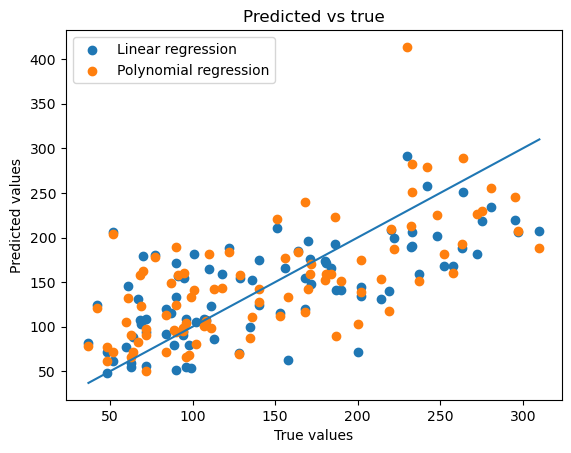

In [8]:
scores_dict = {
    'Polynomial regression':{
        'R2': poly_r2,
        'MAPE': poly_mape,
        'MSE': poly_mse
    }
}
model_names = ['Linear regression', 'Ridge', 'Lasso', 'ElasticNet']
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores_dict[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    }
scores_df = pd.DataFrame(scores_dict).T
print(scores_df)

plt.scatter(y_test, lr_pred_res, label='Linear regression')
plt.scatter(y_test, poly_pred_res, label='Polynomial regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.title('Predicted vs true')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

В задании к датасету были применены линейная и полиномиальная регрессии. Линейная регрессия показала лучшие результаты по сравнению с полиномиальной регрессией по всем трем метрикам (R2, MSE, MAPE). Модель с регуляризацией в сравнении с линейной регрессией без регуляризации оказалась точнее. Самые точные результаты по всем трем метрикам показала Лассо-регрессия.

C:\Users\Rita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

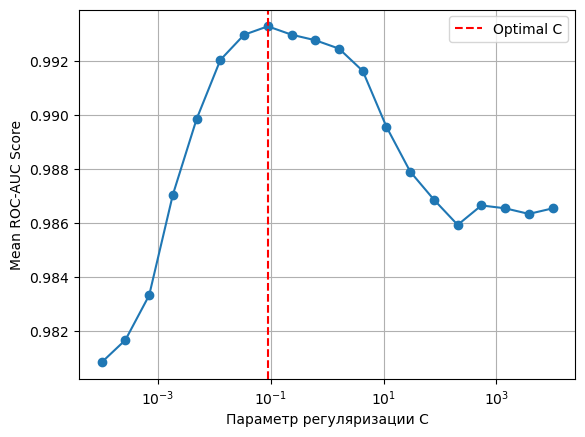

Оптимальное значение параметра C: 0.08858667904100823


In [9]:
data = load_breast_cancer()
X, y = data['data'], data['target']
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
C_values = np.logspace(-4, 4, 20)
searcher = LogisticRegressionCV(Cs=C_values, cv=5, scoring='roc_auc', random_state=42)
searcher.fit(X_train, y_train)
y_proba = searcher.predict_proba(X_test)[:, 1]

plt.plot(C_values, searcher.scores_[1].mean(axis=0), marker='o')
plt.xscale('log')
plt.xlabel('Параметр регуляризации C')
plt.ylabel('Mean ROC-AUC Score')
plt.grid()
plt.axvline(x=searcher.C_, color='r', linestyle='--', label='Optimal C')
plt.legend()
plt.show()
print("Оптимальное значение параметра C:", searcher.C_[0])

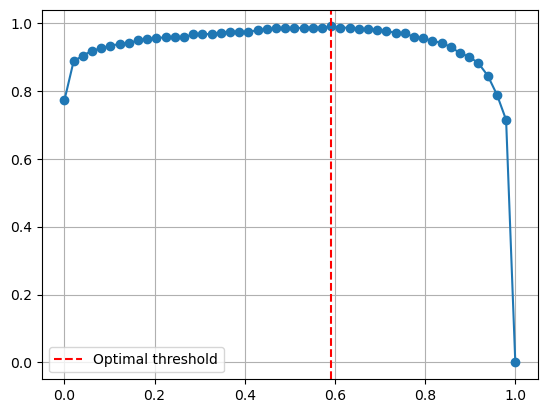

При оптимальном пороге классификации: 0.5918 достигается f1_score = 0.9895


In [10]:
best_model = LogisticRegression(C=searcher.C_[0], random_state=42)
best_model.fit(X_train, y_train)
y_proba = best_model.predict_proba(X_train)[:, 1]

thresholds = np.linspace(0, 1, 50)
f1_scores = [f1_score(y_train, y_proba >= threshold) for threshold in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label='Optimal threshold')
plt.legend()
plt.grid()
plt.show()
print(f'При оптимальном пороге классификации: {optimal_threshold:.4f} достигается f1_score = {max(f1_scores):.4f}')

In [11]:
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
y_pred_test = (y_pred_proba_test >= optimal_threshold).astype(int)

f1_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

print(f'На тестовых данных с порогом {optimal_threshold:.4f}:')
print(f'F1-score: {f1_test:.4f}')
print(f'Precision: {precision_test:.4f}')
print(f'Recall: {recall_test:.4f}')

На тестовых данных с порогом 0.5918:
F1-score: 0.9787
Precision: 0.9857
Recall: 0.9718


В окрестности оптимального значения порога имеется плато, что свидетельствует о качестве модели классификации, а также об устойчивости модели при варьировании порога классификации. Метрики классификации на test наборе высоки, модель точна и не переобучена.